In [0]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(24)

# Analyse the training data

## Merging the original training and development datasets for the QuEst++ features and the visual features

In [2]:
# Merge the original training and development data
train_data_o = pd.read_csv('quest_baseline.training', sep='\t', header=None)
print('Shape of the original training data:', train_data_o.shape)

dev_data_o = pd.read_csv('quest_baseline.dev', sep='\t', header=None)
print('Shape of the original development data:', dev_data_o.shape)

Shape of the original training data: (1000, 15)
Shape of the original development data: (200, 15)


In [3]:
train_data = pd.concat([train_data_o, dev_data_o], ignore_index=True)
print('Shape of the new training data:', train_data.shape)
train_data.head(10)

Shape of the new training data: (1200, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,52.0,55.0,3.507441,-63.597546,-68.175510,1.195652,0.017857,0.352679,0.006098,0.085366,0.000000,0.018750,0.405449,6.0,4.0
1,360.0,387.0,3.703417,-114.292380,-158.321290,2.162011,0.005254,0.682328,0.040143,0.217052,0.014841,0.044156,0.806435,14.0,15.0
2,117.0,150.0,4.760331,-40.225380,-98.485980,1.785714,0.000000,0.666667,0.047755,0.414370,0.072501,0.183569,0.888889,14.0,12.0
3,234.0,256.0,4.160714,-92.318474,-110.450455,1.684211,0.072579,0.627770,0.047683,0.192912,0.000000,0.068468,0.789225,28.0,28.0
4,272.0,324.0,4.745281,-93.174440,-138.666720,1.830508,0.035162,0.759019,0.033275,0.359057,0.012778,0.053227,0.870030,21.0,20.0
5,88.0,102.0,4.421429,-35.544030,-92.308110,1.342105,0.025974,0.666991,0.044168,0.234714,0.024351,0.040224,0.831733,6.0,7.0
6,692.0,906.0,4.341104,-189.767670,-416.593840,3.380597,0.003374,0.826680,0.028968,0.562447,0.071673,0.220262,0.858071,90.0,112.0
7,24.0,31.0,3.382051,-40.302097,-57.029163,1.148148,0.025641,0.574359,0.092593,0.287037,0.030303,0.121212,0.666667,2.0,2.0
8,230.0,290.0,3.919201,-112.339264,-280.610300,1.858974,0.001938,0.758263,0.028901,0.525074,0.042647,0.226734,0.779702,21.0,20.0
9,146.0,161.0,3.592496,-131.358150,-167.354890,1.610000,0.018373,0.559919,0.003279,0.134582,0.009091,0.020428,0.649792,16.0,15.0


In [4]:
# Merge the original training and development visual feature data
train_vis_o = pd.read_csv('train.vis', sep=' ', header=None)
print('Shape of the training visual data:', train_vis_o.shape)

dev_vis_o = pd.read_csv('dev.vis', sep=' ', header=None)
print('Shape of the development visual data:', dev_vis_o.shape)

Shape of the training visual data: (1000, 4096)
Shape of the development visual data: (200, 4096)


In [5]:
train_vis = pd.concat([train_vis_o, dev_vis_o], ignore_index=True)
print('Shape of the new training visual data:', train_vis.shape)
train_vis.head(10)

Shape of the new training visual data: (1200, 4096)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,2.7396,0.0,0.0,0.0000,4.1605,0.0,0.0440,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.414,0.0,0.0265,0.281,0.0000,0.0678,0.2610,0.000,1.3830,0.0,0.000,0.0,1.6199,0.0000,1.2507,0.00,0.0000,0.0000,0.2429,0.0,0.000,0.0,0.0,0.2038,0.0,1.8471,0.0,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.7819,2.5846,0.0000,3.4134,0.0000,0.9278,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,1.1277,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,1.0009,0.0000,0.0000,0.0,0.7427,0.0,0.0000,2.2795
1,0.0000,0.0,0.0,1.3101,2.1765,0.0,2.6695,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.000,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,...,0.0,0.9018,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,1.3306,3.6221,0.0000,0.0000,1.4687,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,1.4722,0.0000,0.0000,0.0,0.0,0.0000,4.3716,1.5189,0.0000,1.6594,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000
2,0.0000,0.0,0.0,0.8515,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.9646,0.0,0.000,0.0,6.3354,0.000,0.2316,0.0000,0.3611,0.000,0.0000,0.0,1.722,0.0,0.0000,3.4300,0.0000,0.00,4.0676,0.0000,1.8133,0.0,0.000,0.0,0.0,1.1554,0.0,3.4075,0.0,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,2.2846,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,3.1777,0.0000,0.0000,0.0,0.0,0.0000,3.0279,0.0000,0.0000,0.0000,0.0000,3.2546,0.0,0.0000,0.0,1.7262,0.0000
3,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.000,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000
4,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0,0.000,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000
5,0.0000,0.0,0.0,0.0000,0.9361,0.0,0.0000,0.0000,0.0,2.7267,0.0,0.0000,0.0,0.000,0.0,0.3418,0.000,0.0000,0.0000,0.0000,3.832,0.7965,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.17,0.1327,0.4802,0.0000,0.0,0.115,0.0,0.0,0.0000,0.0,0.0000,0.0,...,0.0,2.8613,0.0000,0.0,0.0,1.5164,0.0,0.0,0.0000,0.0000,0.0000,5.9563,0.0000,0.0000,0.5474,0.0,0.0000,0.0,0.0,0.0,0.0,1.8343,0.0,2.0744,0.9994,0.0000,0.0,0.0,5.3163,0.0000,0.0000,0.0000,6.2201,0.0000,0.0000,0.0,0.4086,0.0,0.0000,4.5783
6,0.0000,0.0,0.0,3.5648,0.0000,0.0,0.0000,2.7257,0.0,0.0000,0.0,0.0000,0.0,0.000,0.0,0.0000,0.000,0.0000,0.0000,2.3754,0.000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.00,3.4715,0.0000,3.4757,0.0,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,...,0.0,2.1506,0.0000,0.0,0.0,0.0000,0.0,0.0,1.0573,0.0000,0.0000,0.0000,1.1642,0.0000,0.6633,0.0,0.2878,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,1.7894,1.9156,0.0,0.0,0.0000,0.0000,1.0686,2.0013,0.0000,0.0000,2.7214,0.0,0.0000,0.0,0.0000,0.0000
7,0.0000,0.0,0.0,0.0000,2.2189,0.0,0.0000,0.0000,0.0,3.7437,0.0,0.0000,0.0,0.000,0.0,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0,0.000,0.0,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0,0.000,0.0,0.0,0.0000,0.0,0.0000,0.0,...,0.0,5.1702,0.0000,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,5.0668,0.0000,2.4230,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.7625,0.0000,0.

## PCA on the training dataset to choose the number of principal components

In [6]:
# Scale the values
scaler = StandardScaler()

scaler.fit(train_vis)
scale_train_vis = scaler.transform(train_vis)
scale_train_vis

array([[ 4.71308568e+00, -3.89358966e-01, -4.10644213e-01, ...,
        -4.66736626e-01, -4.27071391e-01,  1.22408696e+00],
       [-2.81974651e-01, -3.89358966e-01, -4.10644213e-01, ...,
        -4.66736626e-01, -4.27071391e-01, -4.82972692e-01],
       [-2.81974651e-01, -3.89358966e-01, -4.10644213e-01, ...,
        -4.66736626e-01,  7.33602652e-01, -4.82972692e-01],
       ...,
       [ 1.50338204e+00, -3.89358966e-01,  4.14590648e-03, ...,
        -4.66736626e-01,  2.18033941e-03, -4.82972692e-01],
       [-2.81974651e-01, -3.89358966e-01, -4.10644213e-01, ...,
         4.53217348e-01, -4.27071391e-01,  7.33424317e-01],
       [-2.81974651e-01, -3.89358966e-01, -4.10644213e-01, ...,
        -4.66736626e-01, -4.27071391e-01, -4.82972692e-01]])

In [7]:
# Fit the PCA first without precising the number of components to see 
# the explained variance

pca_all = PCA().fit(scale_train_vis)
print('Explained variance for the PCA:', pca_all.explained_variance_ratio_)

Explained variance for the PCA: [3.04773207e-02 2.74179503e-02 2.25351242e-02 ... 1.06359785e-35
 7.57925489e-36 1.18233734e-36]


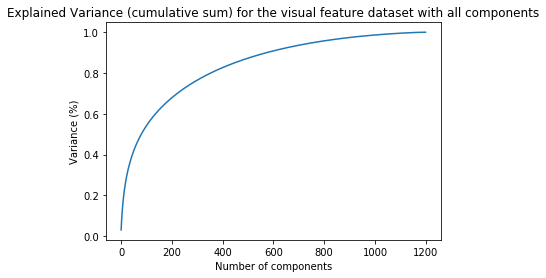

In [8]:
# Plot the Explained Variance (cumulative sum) to choose 
# the number of principal components to keep

plt.figure()
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') # per component
plt.title(
    'Explained Variance (cumulative sum) for the visual feature dataset with all components'
    )
plt.show()

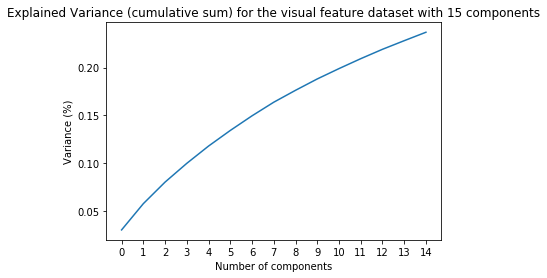

In [9]:
# Now, fit the PCA with a reasonable number of components (15) to better see 
# how many components to choose

pca_15 = PCA(n_components=15).fit(scale_train_vis)

plt.figure()
plt.plot(np.cumsum(pca_15.explained_variance_ratio_))
plt.xticks(range(0, 15))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') # per component
plt.title(
    'Explained Variance (cumulative sum) for the visual feature dataset with 15 components'
    )
plt.show()

# PCA with 2 components

## On the training dataset

In [0]:
# PCA with 2 components
pca_2 = PCA(n_components=2).fit(scale_train_vis)

In [11]:
pricipal_components_train_2 = pca_2.transform(scale_train_vis)
pc_train_data_2 = pd.DataFrame(data=pricipal_components_train_2, 
                               columns=['vis 1', 'vis 2'])
print('Shape of the reduced training visual features (2):', pc_train_data_2.shape)
pc_train_data_2.head(10)

Shape of the reduced training visual features (2): (1200, 2)


,vis 1,vis 2
0,-10.842554,0.383791
1,-12.611924,-15.891151
2,3.557573,-8.661565
3,-1.067465,-2.757689
4,-1.067465,-2.757689
5,-11.227780,-11.498988
6,3.121695,-6.273285
7,-9.435093,-9.592392
8,13.744148,5.849540
9,4.594125,0.560776


In [12]:
train_data_vis_2 = pd.concat([train_data, pc_train_data_2], axis=1)
print('Shape of the training dataset with visual features', train_data_vis_2.shape)
train_data_vis_2.head(10)

Shape of the training dataset with visual features (1200, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,vis 1,vis 2
0,52.0,55.0,3.507441,-63.597546,-68.175510,1.195652,0.017857,0.352679,0.006098,0.085366,0.000000,0.018750,0.405449,6.0,4.0,-10.842554,0.383791
1,360.0,387.0,3.703417,-114.292380,-158.321290,2.162011,0.005254,0.682328,0.040143,0.217052,0.014841,0.044156,0.806435,14.0,15.0,-12.611924,-15.891151
2,117.0,150.0,4.760331,-40.225380,-98.485980,1.785714,0.000000,0.666667,0.047755,0.414370,0.072501,0.183569,0.888889,14.0,12.0,3.557573,-8.661565
3,234.0,256.0,4.160714,-92.318474,-110.450455,1.684211,0.072579,0.627770,0.047683,0.192912,0.000000,0.068468,0.789225,28.0,28.0,-1.067465,-2.757689
4,272.0,324.0,4.745281,-93.174440,-138.666720,1.830508,0.035162,0.759019,0.033275,0.359057,0.012778,0.053227,0.870030,21.0,20.0,-1.067465,-2.757689
5,88.0,102.0,4.421429,-35.544030,-92.308110,1.342105,0.025974,0.666991,0.044168,0.234714,0.024351,0.040224,0.831733,6.0,7.0,-11.227780,-11.498988
6,692.0,906.0,4.341104,-189.767670,-416.593840,3.380597,0.003374,0.826680,0.028968,0.562447,0.071673,0.220262,0.858071,90.0,112.0,3.121695,-6.273285
7,24.0,31.0,3.382051,-40.302097,-57.029163,1.148148,0.025641,0.574359,0.092593,0.287037,0.030303,0.121212,0.666667,2.0,2.0,-9.435093,-9.592392
8,230.0,290.0,3.919201,-112.339264,-280.610300,1.858974,0.001938,0.758263,0.028901,0.525074,0.042647,0.226734,0.779702,21.0,20.0,13.744148,5.849540
9,146.0,161.0,3.592496,-131.358150,-167.354890,1.610000,0.018373,0.559919,0.003279,0.134582,0.009091,0.020428,0.649792,16.0,15.0,4.594125,0.560776


In [0]:
# Save the results
train_data_vis_2.to_csv("quest.train_2", header=None, index=None, sep="\t")

## On the test dataset

In [14]:
# Load the test data
test_data = pd.read_csv('quest_baseline.test', sep='\t', header=None)
print('Shape of the test data:', test_data.shape)

test_vis = pd.read_csv('test.vis', sep=' ', header=None)
print('Shape of the test visual data:', test_vis.shape)
test_vis.head(10)

Shape of the test data: (269, 15)
Shape of the test visual data: (269, 4096)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.2250,7.8897,0.0000,1.0645,0.0000,0.0,0.0000,1.1349,0.0000,0.0,2.7697,0.0000,0.0000,6.9046,0.3314,0.0000,0.0,0.0000,0.0000,0.0,0.7762,0.0,3.9748,0.0000,0.0000,1.2937,0.0000,0.0,0.0,0.0,2.9966,0.0,0.0000,0.0000,0.0000,2.4133,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.5740,0.0000,0.0000,0.0,0.0,0.0,3.5797,0.0,1.8083,0.0,0.0000,0.0,0.0000,0.0000,0.0000,2.2764,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.1571,0.0,0.0000,0.0000,0.0000,0.000,0.0000
1,0.0,0.0000,5.1954,0.0000,0.0000,0.0000,0.0,0.3163,1.0294,1.3887,0.0,1.9782,0.0000,0.0000,5.0172,0.6828,0.0000,0.0,0.0000,0.0000,0.0,0.6945,0.0,2.3645,0.6070,0.0000,1.2097,0.6567,0.0,0.0,0.0,1.7503,0.0,0.0000,0.0000,0.0000,0.2764,0.0,0.1361,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.4182,0.0,1.8929,0.0000,2.7963,0.0,0.0,0.0,1.6423,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.5247,0.0000,0.9742,0.0,0.8003,0.0000,0.0,0.0,0.0000,0.0000,0.2717,0.0,1.8090,0.0,0.0000,1.0397,0.0000,0.000,0.0000
2,0.0,0.8063,8.9762,0.0000,0.0000,0.4279,0.0,0.0000,0.6516,0.0000,0.0,0.8707,0.0000,0.0000,9.7308,0.0000,0.0000,0.0,0.0000,0.0000,0.0,1.4723,0.0,1.9677,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,3.4777,0.0,0.0000,0.0000,0.0000,1.6678,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,1.2961,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,5.3503,0.0,2.9735,0.0,0.0000,0.0,0.0000,0.0000,0.3791,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.3150,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.000,0.0000
3,0.0,0.0000,0.0000,0.0000,2.7722,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,1.7032,5.7182,4.6743,0.0000,0.0,0.0000,1.4857,0.0,0.4197,0.0,0.0000,0.0000,0.0000,3.7416,0.9684,0.0,0.0,0.0,1.8696,0.0,0.3880,2.3815,0.0000,1.2549,0.0,0.0000,0.0000,...,3.2053,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000,1.1798,0.0000,0.0,0.0,0.0,4.6882,0.0,4.5002,0.0,0.0000,0.0,0.2083,0.0000,0.0000,8.2904,0.0,0.0000,0.0000,0.0,0.0,0.0000,2.1811,0.0000,0.0,0.0000,0.0,0.7355,0.0000,0.0000,0.000,0.0000
4,0.0,0.1391,10.5551,0.0000,0.0000,0.0449,0.0,0.0000,0.0000,0.0000,0.0,3.0774,0.0000,0.0000,8.5356,0.7609,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0,0.0249,0.0000,0.0000,0.9497,0.0000,0.0,0.0,0.0,1.3171,0.0,0.0000,0.0000,0.0000,0.4459,0.0,1.1618,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.1062,0.3852,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,4.5815,0.0,6.5414,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.3516,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.7069,0.0000,0.0000,0.000,0.0000
5,0.0,0.0000,7.2785,0.0000,0.0000,0.8441,0.0,4.0250,0.0000,0.0000,0.0,4.3824,0.0000,0.0000,6.6332,0.1680,1.2724,0.0,0.0000,0.9659,0.0,0.0000,0.0,1.8862,1.3697,0.0000,0.6493,0.0000,0.0,0.0,0.0,3.7784,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.2696,0.0000,0.0000,0.0,0.0,0.0,1.5873,0.0,1.4096,0.0,0.0000,0.0,0.0000,1.1773,0.0000,1.8446,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,2.6178,0.0000,0.000,0.0000
6,0.0,0.0000,2.4024,0.0000,4.3286,0.0000,0.0,0.7883,1.2268,0.0000,0.0,2.3197,0.0000,0.4793,0.0000,3.2331,0.0000,0.0,0.3768,0.0000,0.0,2.5622,0.0,3.1615,1.6912,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.6690,0.0,0.0000,0.1883,0.6563,2.9486,0.0,0.0000,0.0000,...,0.0141,0.0,0.9391,0.0000,0.0,0.0000,2.2763,0.0,6.0744,0.4678,3.2381,0.0,0.0,0.0,0.7405,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,1.3297,0.5497,0.0,0.0,0.0241,1.1180,0.0000,0.0,0.7705,0.0,0.1010,0.0000,2.0317,0.000,0.7798
7,0.0,0.6900,0.0000,1.4189,0.1433,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.3115,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.7772,0.0,0.0000,0.0,3.4951,1.5665,0.0000,0.0000,0.6415,0.0,0.0,0.0,0.0000,0.0,0.2769,0.0000,0.0000,0.0000,0.0,0.0000,6.0414,...,0

In [15]:
# Scaling of the test data
scale_test_vis = scaler.transform(test_vis)
scale_test_vis

array([[-0.28197465, -0.18518336,  4.64664171, ..., -0.46673663,
        -0.42707139, -0.48297269],
       [-0.28197465, -0.38935897,  2.91959961, ..., -0.46673663,
        -0.42707139, -0.48297269],
       [-0.28197465,  0.34231568,  5.34308671, ..., -0.46673663,
        -0.42707139, -0.48297269],
       ...,
       [-0.28197465, -0.38935897, -0.41064421, ..., -0.46673663,
        -0.42707139, -0.42688198],
       [-0.28197465, -0.38935897,  0.21759841, ...,  0.08720097,
        -0.42707139,  0.7428601 ],
       [-0.28197465, -0.38935897, -0.41064421, ..., -0.46673663,
        -0.42707139,  1.07566002]])

In [16]:
# PCA with 2 components on the test data 
pricipal_components_test_2 = pca_2.transform(scale_test_vis)
pc_test_data_2 = pd.DataFrame(data=pricipal_components_test_2, 
                               columns=['vis 1', 'vis 2'])
print('Shape of the reduced test visual features (2):', pc_test_data_2.shape)
pc_test_data_2.head(10)

Shape of the reduced test visual features (2): (269, 2)


,vis 1,vis 2
0,-11.316785,16.170978
1,-13.074886,18.147145
2,-13.344120,13.453017
3,-12.855571,26.806394
4,-16.015124,17.029873
5,-16.957437,22.758209
6,-6.035775,10.024031
7,6.725687,6.306912
8,-18.287390,21.215863
9,-14.831185,15.969969


In [17]:
test_data_vis_2 = pd.concat([test_data, pc_test_data_2], axis=1)
print('Shape of the test dataset with visual features', test_data_vis_2.shape)
test_data_vis_2.head(10)

Shape of the test dataset with visual features (269, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,vis 1,vis 2
0,9.0,9.0,2.125000,-24.07420,-39.105300,1.000000,0.000000,0.375000,0.000000,0.071429,0.000000,0.000000,0.437500,0.0,0.0,-11.316785,16.170978
1,8.0,7.0,2.285714,-23.01260,-32.454600,1.000000,0.000000,0.428571,0.000000,0.083333,0.000000,0.000000,0.500000,0.0,0.0,-13.074886,18.147145
2,12.0,9.0,2.045454,-41.24530,-28.278300,1.000000,0.000000,0.363636,0.100000,0.000000,0.000000,0.000000,0.409091,0.0,0.0,-13.344120,13.453017
3,14.0,15.0,1.846154,-36.11030,-50.683600,1.071428,0.000000,0.384615,0.041667,0.041667,0.000000,0.000000,0.423077,0.0,0.0,-12.855571,26.806394
4,5.0,5.0,3.750000,-9.04518,-7.967850,1.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000,0.0,0.0,-16.015124,17.029873
5,9.0,10.0,2.687500,-25.24800,-42.851100,1.000000,0.000000,0.312500,0.071429,0.071429,0.000000,0.000000,0.437500,0.0,0.0,-16.957437,22.758209
6,51.0,57.0,3.651308,-40.42516,-47.870903,1.295454,0.048980,0.684485,0.011905,0.341126,0.000000,0.090260,0.744453,0.0,0.0,-6.035775,10.024031
7,1068.0,1238.0,4.433172,-100.04768,-325.155800,2.516260,0.009834,0.849602,0.029130,0.661944,0.078401,0.511531,0.905078,143.0,134.0,6.725687,6.306912
8,9.0,10.0,2.062500,-29.86960,-44.921900,1.000000,0.000000,0.250000,0.000000,0.071429,0.000000,0.000000,0.437500,0.0,0.0,-18.287390,21.215863
9,6.0,6.0,2.600000,-16.19670,-27.438300,1.000000,0.000000,0.400000,0.000000,0.125000,0.000000,0.000000,0.500000,0.0,0.0,-14.831185,15.969969


In [0]:
# Save the results
test_data_vis_2.to_csv("quest.test_2", header=None, index=None, sep="\t")

# PCA with 5 components

In [0]:
# PCA with 5 components
pca_5 = PCA(n_components=5).fit(scale_train_vis)

In [20]:
pricipal_components_train_5 = pca_5.transform(scale_train_vis)
pc_train_data_5 = pd.DataFrame(data=pricipal_components_train_5, 
                               columns=['vis 1', 'vis 2', 'vis 3', 'vis 4', 'vis 5'])
print('Shape of the reduced training visual features (5):', pc_train_data_5.shape)
pc_train_data_5.head(10)

Shape of the reduced training visual features (5): (1200, 5)


,vis 1,vis 2,vis 3,vis 4,vis 5
0,-10.840412,0.378084,17.274024,0.574021,3.123024
1,-12.611293,-15.890084,20.157184,3.091624,9.669361
2,3.557269,-8.662200,-3.413317,-1.860378,-2.807534
3,-1.067776,-2.756289,-0.375192,-2.204395,0.010191
4,-1.067776,-2.756289,-0.375192,-2.204395,0.010191
5,-11.227216,-11.498668,17.979074,3.595257,14.824886
6,3.121427,-6.274508,6.043754,9.085908,0.342410
7,-9.434206,-9.591563,15.959275,-1.728486,11.333457
8,13.744576,5.857445,3.862031,5.562911,1.671831
9,4.592923,0.559144,-1.753853,-4.963489,-9.628025


In [21]:
train_data_vis_5 = pd.concat([train_data, pc_train_data_5], axis=1)
print('Shape of the training dataset with visual features', train_data_vis_5.shape)
train_data_vis_5.to_csv("quest.train_5", header=None, index=None, sep="\t")

Shape of the training dataset with visual features (1200, 20)


In [22]:
# PCA with 5 components on the test data 
pricipal_components_test_5 = pca_5.transform(scale_test_vis)
pc_test_data_5 = pd.DataFrame(data=pricipal_components_test_5, 
                               columns=['vis 1', 'vis 2', 'vis 3', 'vis 4', 'vis 5'])
print('Shape of the reduced test visual features (5):', pc_test_data_5.shape)
pc_test_data_5.head(10)

Shape of the reduced test visual features (5): (269, 5)


,vis 1,vis 2,vis 3,vis 4,vis 5
0,-11.318379,16.168441,1.012484,-9.344539,-7.611812
1,-13.074640,18.141183,11.842711,-10.606447,-15.408891
2,-13.345816,13.448861,1.869260,-6.366974,-5.679850
3,-12.857252,26.806150,-14.811955,2.864046,8.263843
4,-16.016633,17.024687,0.678425,-6.460152,-11.774180
5,-16.957589,22.752237,7.723463,-9.784074,-15.284916
6,-6.035002,10.022854,2.805631,-10.181959,-11.583468
7,6.727079,6.306059,9.707113,-8.365951,-6.394410
8,-18.288296,21.212939,9.526999,-17.231540,-21.644640
9,-14.831970,15.965639,8.505549,-10.097002,-17.954606


In [23]:
test_data_vis_5 = pd.concat([test_data, pc_test_data_5], axis=1)
print('Shape of the test dataset with visual features', test_data_vis_5.shape)
test_data_vis_5.to_csv("quest.test_5", header=None, index=None, sep="\t")

Shape of the test dataset with visual features (269, 20)


# PCA with 10 components

In [0]:
# PCA with 10 components
pca_10 = PCA(n_components=10).fit(scale_train_vis)

In [25]:

pricipal_components_train_10 = pca_10.transform(scale_train_vis)
pc_train_data_10 = pd.DataFrame(data=pricipal_components_train_10, 
                               columns=['vis 1', 'vis 2', 'vis 3', 'vis 4', 'vis 5', 
                                        'vis 6', 'vis 7', 'vis 8', 'vis 9', 'vis 10'])
print('Shape of the reduced training visual features (10):', pc_train_data_10.shape)
pc_train_data_10.head(10)

Shape of the reduced training visual features (10): (1200, 10)


,vis 1,vis 2,vis 3,vis 4,vis 5,vis 6,vis 7,vis 8,vis 9,vis 10
0,-10.841731,0.377288,17.287628,0.571574,3.097020,20.480119,21.088741,-5.962375,-8.745468,7.819036
1,-12.611852,-15.890243,20.155906,3.100118,9.640444,3.170422,11.698848,3.555308,2.438807,11.927594
2,3.557560,-8.661922,-3.415265,-1.855656,-2.803459,3.678824,-8.445080,1.768508,1.766200,-2.112357
3,-1.067702,-2.756302,-0.376356,-2.200959,0.006584,-0.340768,-4.254966,-0.851123,-0.781837,1.484076
4,-1.067702,-2.756302,-0.376356,-2.200959,0.006584,-0.340768,-4.254966,-0.851123,-0.781837,1.484076
5,-11.227644,-11.499085,17.987721,3.601889,14.790810,1.596441,9.219404,-0.404352,-0.938718,8.932578
6,3.121606,-6.274123,6.037916,9.095435,0.343138,0.654539,-4.027682,2.249933,6.835885,4.978114
7,-9.435059,-9.592047,15.966950,-1.727219,11.307336,-0.662346,10.103141,-1.015122,-5.450839,11.425023
8,13.743370,5.856079,3.870979,5.558243,1.623466,-4.116409,3.029419,-19.634115,1.099439,-5.749072
9,4.594271,0.560629,-1.766447,-4.950267,-9.596104,-4.398389,-1.663713,7.609754,9.316964,5.884034


In [26]:
train_data_vis_10 = pd.concat([train_data, pc_train_data_10], axis=1)
print('Shape of the training dataset with visual features', train_data_vis_10.shape)
train_data_vis_10.to_csv("quest.train_10", header=None, index=None, sep="\t")

Shape of the training dataset with visual features (1200, 25)


In [27]:
# PCA with 10 components on the test data 
pricipal_components_test_10 = pca_10.transform(scale_test_vis)
pc_test_data_10 = pd.DataFrame(data=pricipal_components_test_10, 
                               columns=['vis 1', 'vis 2', 'vis 3', 'vis 4', 'vis 5', 
                                        'vis 6', 'vis 7', 'vis 8', 'vis 9', 'vis 10'])
print('Shape of the reduced test visual features (10):', pc_test_data_10.shape)
pc_test_data_10.head(10)

Shape of the reduced test visual features (10): (269, 10)


,vis 1,vis 2,vis 3,vis 4,vis 5,vis 6,vis 7,vis 8,vis 9,vis 10
0,-11.316809,16.169621,0.997409,-9.330840,-7.564225,15.302151,-1.500034,-0.655918,7.889737,-0.836854
1,-13.074482,18.141240,11.839681,-10.610283,-15.394893,17.597492,1.554579,-8.201707,0.320915,-6.451710
2,-13.344031,13.450163,1.853139,-6.352277,-5.630619,16.753683,-6.351233,-2.082533,3.618919,-3.370062
3,-12.855595,26.808226,-14.827426,2.882195,8.340284,0.201966,3.713578,1.168429,7.781054,4.436852
4,-16.014685,17.026289,0.659991,-6.450245,-11.704999,22.272062,-8.886030,-3.802008,7.629177,-5.154486
5,-16.956991,22.752749,7.715153,-9.785515,-15.255944,31.796151,-2.405005,-10.331818,11.583291,-3.365047
6,-6.036166,10.022236,2.820946,-10.188112,-11.630965,-0.952779,12.869869,-11.795038,-2.929888,-7.138073
7,6.725957,6.304705,9.716269,-8.379626,-6.442323,6.930306,9.103383,-3.308544,-6.401425,12.906547
8,-18.286980,21.213930,9.514166,-17.229855,-21.604882,37.041890,7.270023,-14.201571,18.903148,-8.619482
9,-14.830936,15.966471,8.493767,-10.094651,-17.910769,22.333581,-4.242554,-7.116285,5.910919,-7.976561


In [28]:
test_data_vis_10 = pd.concat([test_data, pc_test_data_10], axis=1)
print('Shape of the test dataset with visual features', test_data_vis_10.shape)
test_data_vis_10.to_csv("quest.test_10", header=None, index=None, sep="\t")

Shape of the test dataset with visual features (269, 25)


# PCA with 1 component

In [29]:
# PCA with 1 component
pca_1 = PCA(n_components=1).fit(scale_train_vis)

pricipal_components_train_1 = pca_1.transform(scale_train_vis)
pc_train_data_1 = pd.DataFrame(data=pricipal_components_train_1, 
                               columns=['vis 1'])
print('Shape of the reduced training visual features (1):', pc_train_data_1.shape)
pc_train_data_1.head(10)

Shape of the reduced training visual features (1): (1200, 1)


,vis 1
0,-10.837194
1,-12.612675
2,3.561332
3,-1.069386
4,-1.069386
5,-11.228960
6,3.122771
7,-9.439725
8,13.738683
9,4.596259


In [30]:
train_data_vis_1 = pd.concat([train_data, pc_train_data_1], axis=1)
print('Shape of the training dataset with visual features', train_data_vis_1.shape)
train_data_vis_1.to_csv("quest.train_1", header=None, index=None, sep="\t")

Shape of the training dataset with visual features (1200, 16)


In [31]:
# PCA with 1 component on the test data 
pricipal_components_test_1 = pca_1.transform(scale_test_vis)
pc_test_data_1 = pd.DataFrame(data=pricipal_components_test_1, 
                               columns=['vis 1'])
print('Shape of the reduced test visual features (1):', pc_test_data_1.shape)
pc_test_data_1.head(10)

Shape of the reduced test visual features (1): (269, 1)


,vis 1
0,-11.314641
1,-13.072714
2,-13.341673
3,-12.852144
4,-16.010348
5,-16.952169
6,-6.032390
7,6.721289
8,-18.282671
9,-14.827546


In [32]:
test_data_vis_1 = pd.concat([test_data, pc_test_data_1], axis=1)
print('Shape of the test dataset with visual features', test_data_vis_1.shape)
test_data_vis_1.to_csv("quest.test_1", header=None, index=None, sep="\t")

Shape of the test dataset with visual features (269, 16)


# PCA with 3 components

In [33]:
# PCA with 3 component
pca_3 = PCA(n_components=3).fit(scale_train_vis)

pricipal_components_train_3 = pca_3.transform(scale_train_vis)
pc_train_data_3 = pd.DataFrame(data=pricipal_components_train_3, 
                               columns=['vis 1', 'vis 2', 'vis 3'])
print('Shape of the reduced training visual features (3):', pc_train_data_3.shape)
pc_train_data_3.head(10)

Shape of the reduced training visual features (3): (1200, 3)


,vis 1,vis 2,vis 3
0,-10.841264,0.376408,17.279104
1,-12.612242,-15.893233,20.137150
2,3.557991,-8.662160,-3.411591
3,-1.067832,-2.755999,-0.376192
4,-1.067832,-2.755999,-0.376192
5,-11.228220,-11.502525,17.969551
6,3.121517,-6.274622,6.032396
7,-9.435401,-9.593951,15.954354
8,13.743498,5.856640,3.875047
9,4.594155,0.560558,-1.766976


In [34]:
train_data_vis_3 = pd.concat([train_data, pc_train_data_3], axis=1)
print('Shape of the training dataset with visual features:', train_data_vis_3.shape)
train_data_vis_3.to_csv("quest.train_3", header=None, index=None, sep="\t")

Shape of the training dataset with visual features: (1200, 18)


In [35]:
# PCA with 3 component on the test data 
pricipal_components_test_3 = pca_3.transform(scale_test_vis)
pc_test_data_3 = pd.DataFrame(data=pricipal_components_test_3, 
                               columns=['vis 1', 'vis 2', 'vis 3'])
print('Shape of the reduced test visual features (3):', pc_test_data_3.shape)
pc_test_data_3.head(10)

Shape of the reduced test visual features (3): (269, 3)


,vis 1,vis 2,vis 3
0,-11.316578,16.169584,1.002772
1,-13.073826,18.141369,11.846989
2,-13.343689,13.449683,1.859762
3,-12.855764,26.806801,-14.835391
4,-16.014396,17.025378,0.663623
5,-16.956452,22.752843,7.720731
6,-6.034956,10.024391,2.839401
7,6.725498,6.304557,9.712733
8,-18.286762,21.214148,9.518880
9,-14.830200,15.967027,8.504091


In [36]:
test_data_vis_3 = pd.concat([test_data, pc_test_data_3], axis=1)
print('Shape of the test dataset with visual features:', test_data_vis_3.shape)
test_data_vis_3.to_csv("quest.test_3", header=None, index=None, sep="\t")

Shape of the test dataset with visual features: (269, 18)
